## 🔍 Step 1: Load and Prepare the Test Data

We'll create a test data generator that reads chest X-ray images from the test directory.  
Images are resized to 224x224 and rescaled to [0, 1] just like during training.


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "../data/test"

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# Class labels mapping
class_labels = list(test_generator.class_indices.keys())
print("✅ Class labels:", class_labels)


Found 624 images belonging to 2 classes.
✅ Class labels: ['NORMAL', 'PNEUMONIA']


### 🔍 Visualizing Predictions from VGG16 Model

In this section, we:
- Loaded the best-performing **VGG16 transfer learning model**.
- Made predictions on the test dataset.
- Visualized a few randomly chosen test images with their **true labels** and **predicted labels**.

For each image:
- The title shows both the ground truth (`True:`) and the model’s prediction (`Pred:`).
- If the prediction is correct, the title appears in **green**.
- If incorrect, it appears in **red**.

This helps us qualitatively understand how well the model is performing on real chest X-ray images.


624/624 ━━━━━━━━━━━━━━━━━━━━ 610s 976ms/step


C:\Users\Poojitha\AppData\Local\Temp\ipykernel_1536\3387972435.py:42: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


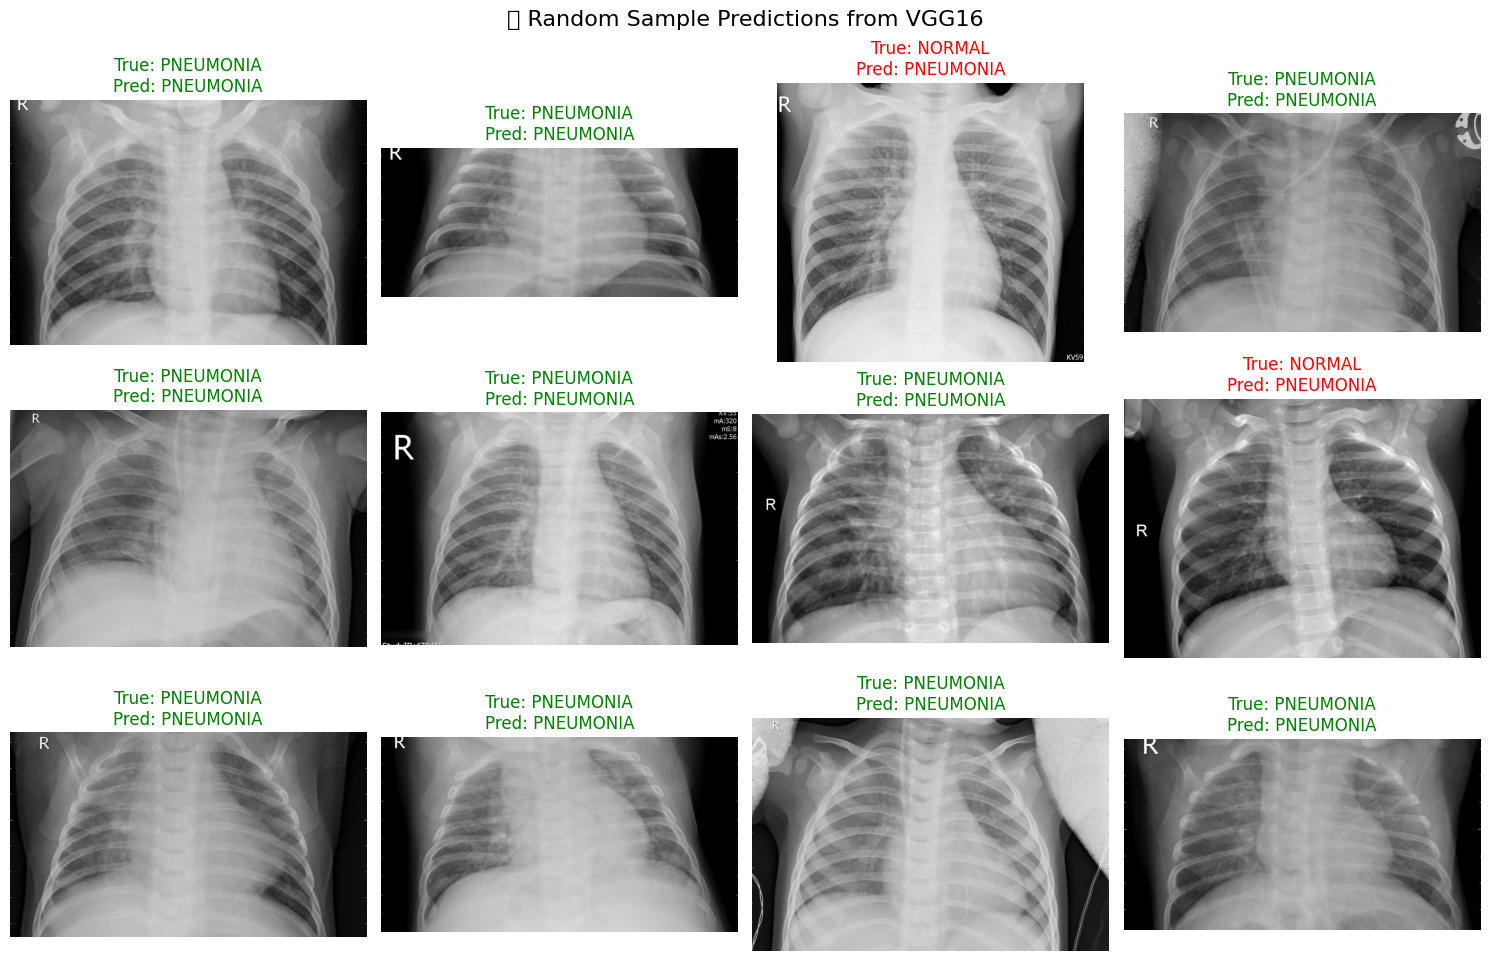

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.image as mpimg

# Load model
model_path = "../models/vgg16/best_vgg16_model.keras"
model = load_model(model_path)

# Predict
predictions = model.predict(test_generator, verbose=1)
predicted_classes = (predictions > 0.5).astype("int32").flatten()

# True labels and file paths
true_classes = test_generator.classes
file_paths = test_generator.filepaths

# Label mapping
label_map = {v: k for k, v in test_generator.class_indices.items()}

# Pick 12 random indices
sample_indices = random.sample(range(len(file_paths)), 12)

# Plotting
plt.figure(figsize=(15, 10))
for i, idx in enumerate(sample_indices):
    img_path = file_paths[idx]
    img = mpimg.imread(img_path)

    true_label = label_map[true_classes[idx]]
    pred_label = label_map[predicted_classes[idx]]

    color = 'green' if true_label == pred_label else 'red'

    plt.subplot(3, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')

plt.suptitle("🔍 Random Sample Predictions from VGG16", fontsize=16)
plt.tight_layout()
plt.show()


### 🔬 Visualizing Predictions from ResNet50

Here we use the trained **ResNet50** model (via transfer learning) to predict on random test samples.  
We highlight mismatches in red to identify model weaknesses, such as class bias or subtle misclassifications.


624/624 ━━━━━━━━━━━━━━━━━━━━ 148s 234ms/step


C:\Users\Poojitha\AppData\Local\Temp\ipykernel_3264\1052343502.py:36: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


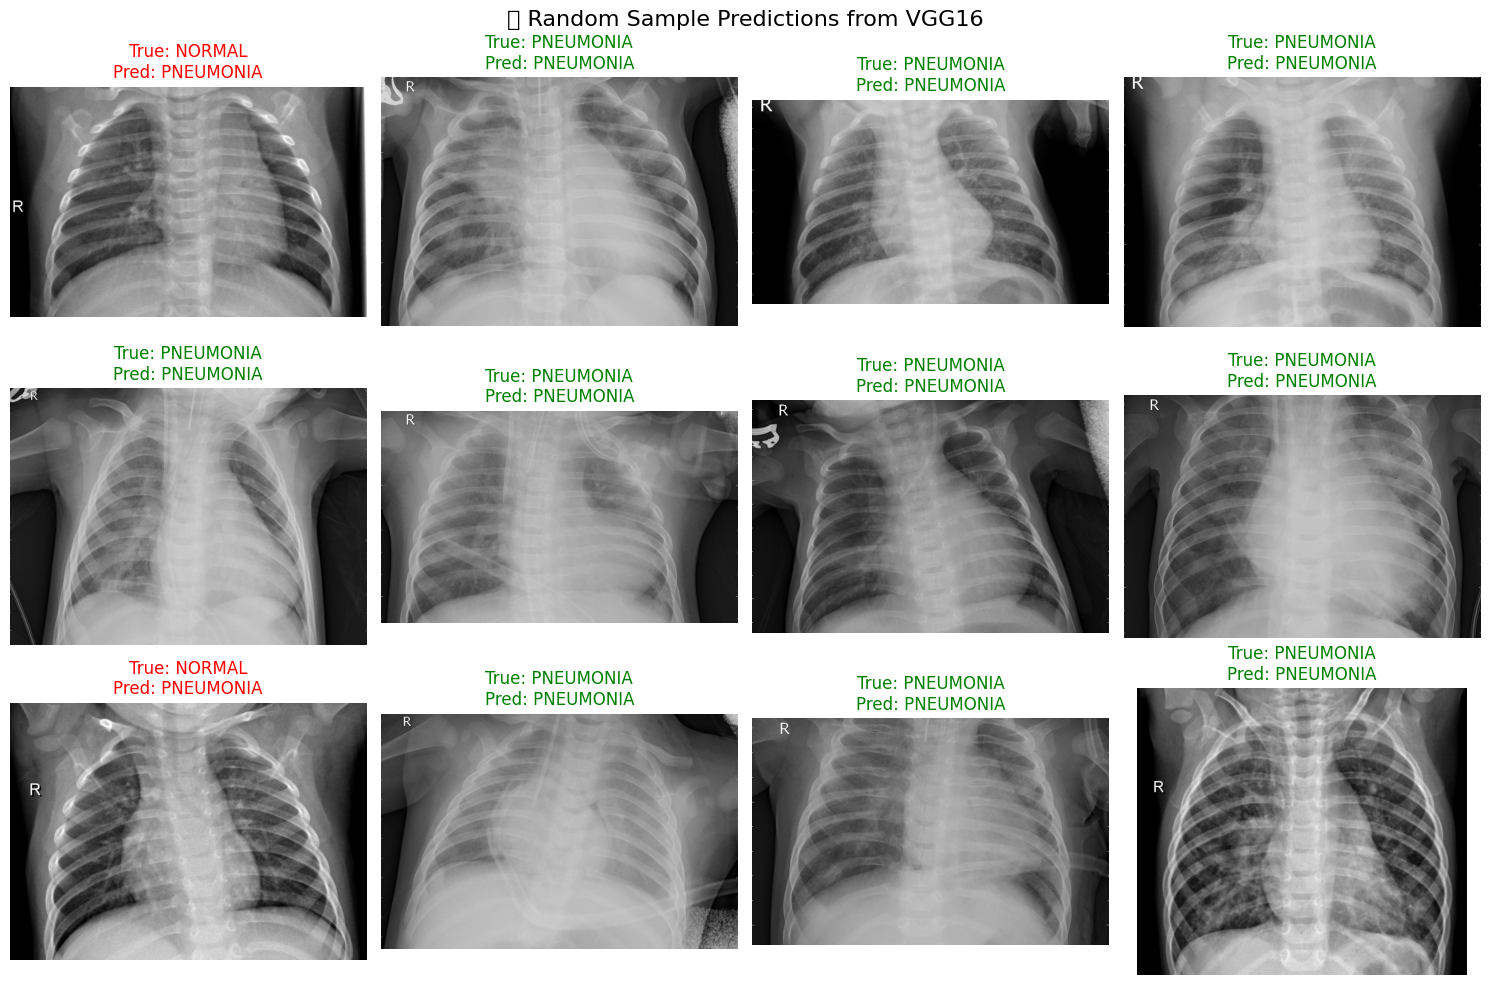

In [18]:
# Load model
model_path = "../models/resnet50/best_resnet50_model.keras"
model = load_model(model_path)

# Predict
predictions = model.predict(test_generator, verbose=1)
predicted_classes = (predictions > 0.5).astype("int32").flatten()

# True labels and file paths
true_classes = test_generator.classes
file_paths = test_generator.filepaths

# Label mapping
label_map = {v: k for k, v in test_generator.class_indices.items()}

# Pick 12 random indices
sample_indices = random.sample(range(len(file_paths)), 12)

# Plotting
plt.figure(figsize=(15, 10))
for i, idx in enumerate(sample_indices):
    img_path = file_paths[idx]
    img = mpimg.imread(img_path)

    true_label = label_map[true_classes[idx]]
    pred_label = label_map[predicted_classes[idx]]

    color = 'green' if true_label == pred_label else 'red'

    plt.subplot(3, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')

plt.suptitle("🔍 Random Sample Predictions from VGG16", fontsize=16)
plt.tight_layout()
plt.show()


### 🔬 Visualizing Predictions from Custom CNN

This section loads the custom-built CNN model and visualizes 12 **random test samples** along with their true and predicted labels.  
Correct predictions are shown in **green**, and incorrect ones in **red**, allowing us to intuitively assess model behavior.


624/624 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step


C:\Users\Poojitha\AppData\Local\Temp\ipykernel_1536\1260379259.py:29: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


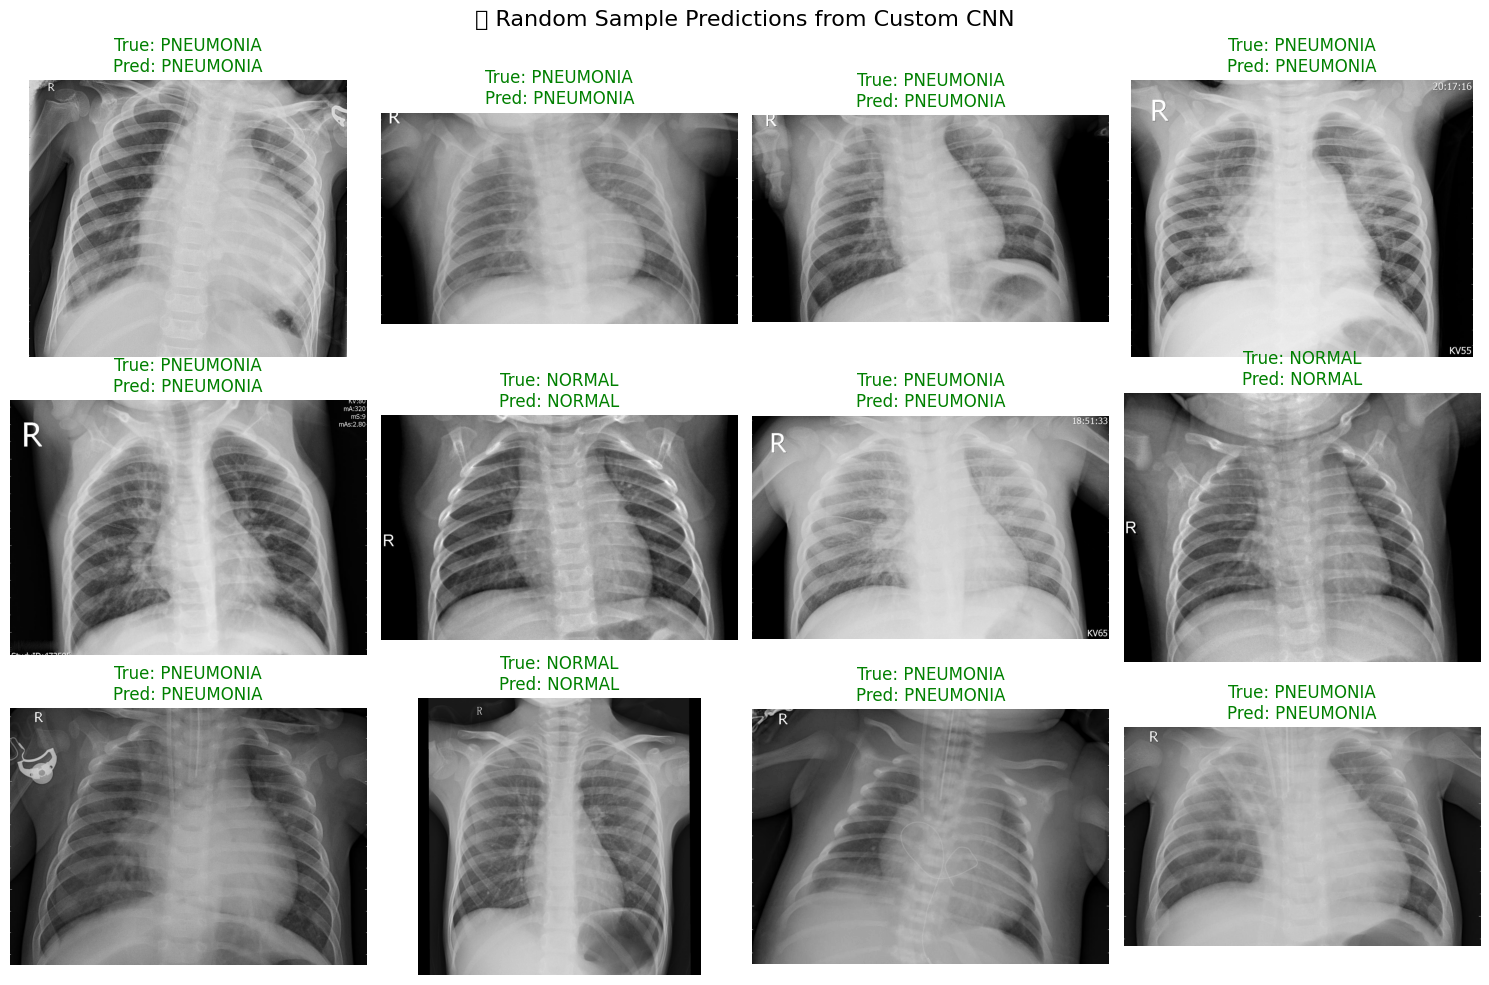

In [3]:
# Load CNN model
cnn_model_path = "../models/baseline/pneumonia_cnn_model.h5"
cnn_model = load_model(cnn_model_path)

# Predict
cnn_predictions = cnn_model.predict(test_generator, verbose=1)
cnn_predicted_classes = (cnn_predictions > 0.5).astype("int32").flatten()

# Random sample indices
sample_indices = random.sample(range(len(file_paths)), 12)

# Plotting
plt.figure(figsize=(15, 10))
for i, idx in enumerate(sample_indices):
    img_path = file_paths[idx]
    img = mpimg.imread(img_path)

    true_label = label_map[true_classes[idx]]
    pred_label = label_map[cnn_predicted_classes[idx]]

    color = 'green' if true_label == pred_label else 'red'

    plt.subplot(3, 4, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')

plt.suptitle("🔍 Random Sample Predictions from Custom CNN", fontsize=16)
plt.tight_layout()
plt.show()


## 📸 Model Predictions Comparison

This section visualizes predictions from all three models — **CNN**, **VGG16**, and **ResNet50** — on the same set of test images.

Each subplot displays:
- The chest X-ray
- Ground truth label
- Predictions from all models

This helps us understand how each model behaves on the same data.


Found 624 images belonging to 2 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━

C:\Users\Poojitha\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


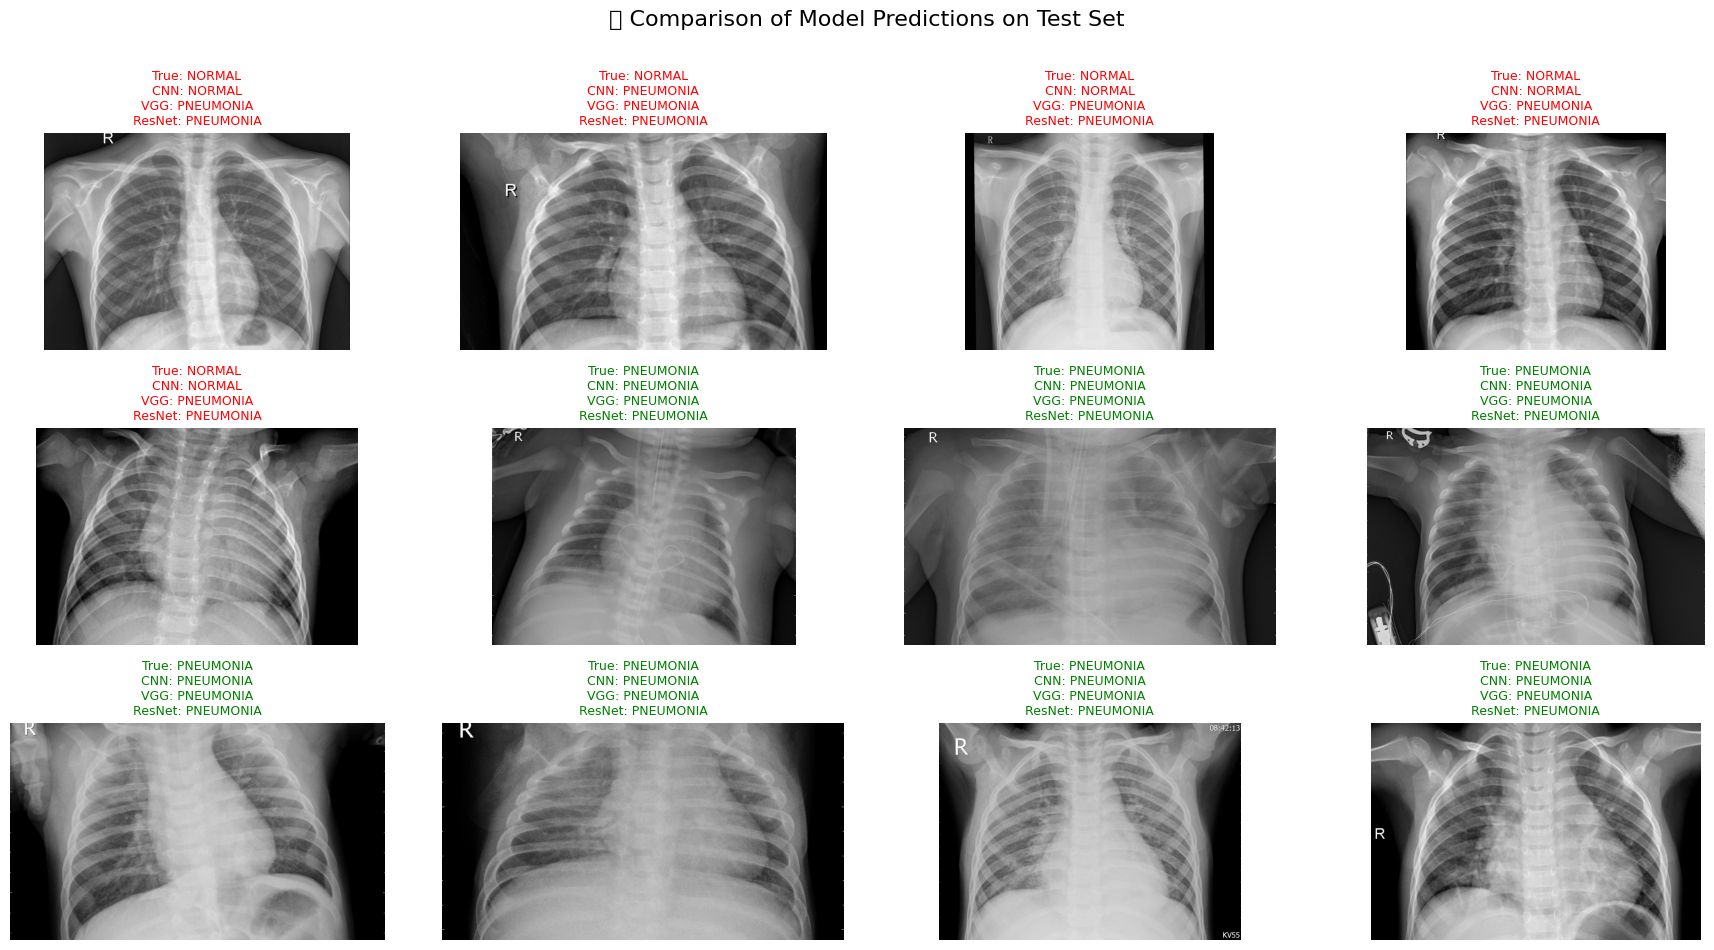

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Paths to saved models
cnn_model_path = "../models/baseline/pneumonia_cnn_model.h5"
vgg_model_path = "../models/vgg16/best_vgg16_model.keras"
resnet_model_path = "../models/resnet50/best_resnet50_model.keras"

# Path to test data
test_dir = "../data/test"

# Prepare test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# Labels
file_paths = test_generator.filepaths
true_classes = test_generator.classes
label_map = {v: k for k, v in test_generator.class_indices.items()}

# Load models
cnn_model = load_model(cnn_model_path)
vgg_model = load_model(vgg_model_path)
resnet_model = load_model(resnet_model_path)

# Select 12 random samples to visualize
num_samples = 12
indices = np.linspace(0, len(file_paths) - 1, num_samples, dtype=int)

# Predict and visualize
plt.figure(figsize=(18, 9))
for i, idx in enumerate(indices):
    img, _ = test_generator[idx]
    true_label = label_map[true_classes[idx]]
    
    cnn_pred = int(cnn_model.predict(img)[0][0] > 0.5)
    vgg_pred = int(vgg_model.predict(img)[0][0] > 0.5)
    resnet_pred = int(resnet_model.predict(img)[0][0] > 0.5)

    cnn_label = label_map[cnn_pred]
    vgg_label = label_map[vgg_pred]
    resnet_label = label_map[resnet_pred]

    plt.subplot(3, 4, i+1)
    plt.imshow(plt.imread(file_paths[idx]), cmap='gray')
    plt.title(
        f"True: {true_label}\nCNN: {cnn_label}\nVGG: {vgg_label}\nResNet: {resnet_label}",
        color='green' if (true_label == cnn_label == vgg_label == resnet_label) else 'red',
        fontsize=9
    )
    plt.axis('off')

plt.tight_layout()
plt.suptitle("📊 Comparison of Model Predictions on Test Set", fontsize=16, y=1.05)
plt.show()
